<center><h1>Cálculo Numérico</h1>
    <h2>Lista de Exercícios 02: Bisseção e Ponto Fixo</h2>
    <hr>
        <p>Aluno: Gabriel Brito Melandes
        <p>Curso: Ciência da Computação
        <p>Matricula: 171057600079
    <hr>
    </center>

<h3>Imports</h3>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize

In [1]:
header = ['k', 'ak', 'xk', 'bk', 'f(xk)', "|bk-ak|"]
table = [] # tabela de preenchimento

<h3> Funções </h3>

In [2]:
def biss(f, a, b, TOL, N):
    i = 1
    fa = f(a)
    while (i <= N):
        # iteracao da bissecao
        p = a + (b-a)/2
        fp = f(p)
        # condicao de parada
        if ((fp == 0) or (np.abs((b-a)/2) < TOL)):
            return p
        # bissecta o intervalo
        i = i+1
        if (fa * fp > 0):
            a = p
            fa = fp
        else:
            b = p

<h3>Exercícios</h3><hr><b>3.2.1.</b> <br>
Considere a equação $\sqrt x = cos(x)$. Use o método da bisseção com
intervalo inicial [a, b] = [0, 1] e $x^{(1)}$ = ${a + b}\over{2}$ para calcular a aproximação $x^{(4)}$
da solução desta equação.

In [3]:
def a(x):
    return math.cos(x)**2 - x
print(biss(a, 0, 1, 1e-1, 4))

0.6875


<hr><b>3.2.2.</b> <br>
Trace o gráfico e isole as três primeiras raízes positivas da função:
$$f(x) = 5sen(x^2)-exp\left  ( x\over10 \right )$$
em intervalos de comprimento 0,1. Então, use o método da bisseção para obter
aproximações dos zeros desta função com precisão de $10^{−5}$.

In [4]:
def b(x):
    return (5*np.sin(x**2)-np.exp(x/10))
roots=[]
for i in range(0, 4):
    print('Intervalo','[',i,':',i+1,'] =',round(biss(b, i, i+1, 1e-5, 20),5))
    roots.append(biss(b, i, i+1, 1e-5, 20))

Intervalo [ 0 : 1 ] = 0.45931
Intervalo [ 1 : 2 ] = 1.70358
Intervalo [ 2 : 3 ] = 2.55822
Intervalo [ 3 : 4 ] = 3.02502


Gráfico

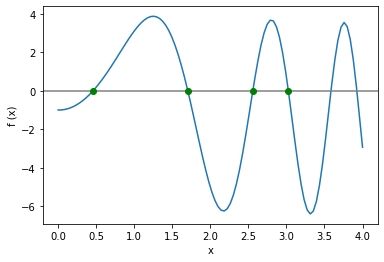

In [5]:
x = np.linspace(0,4,100)
y = 5*np.sin(x**2)-np.exp(x/10)

plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.axhline(0, color='gray')
for i in range (0, 4):
    plt.plot(roots[i], 0, 'go')

plt.show()

<hr><b>3.2.3.</b> <br>
O polinômio $p(x) = −4+8x−5x^2+x^3$ tem raízes $x_1 = 1$ e $x_2 = x_3 = 2$ no intervalo [1/2, 3].

In [6]:
def p(x):
    return (-4+8*x-5*x**2+x**3)

a) Se o método da bisseção for usando com o intervalo inicial [1/2, 3], para qual raiz as iterações convergem?

In [7]:
print(biss(p, 1/2, 3, 1e-4, 30),'Converge para',round(biss(p, 1/2, 3, 1e-4, 30),3))

0.9999542236328125 Converge para 1.0


b) É possível usar o método da bisseção para a raiz x = 2? Justifique sua
resposta.

Seria encontrado apenas uma raiz, pois se $x_2 = x_3 = 2$, ao utilizar do método da bisseção temos que $x_k$ tende a 2, Outra forma é visualizando o gráfico da função plotado abaixo.

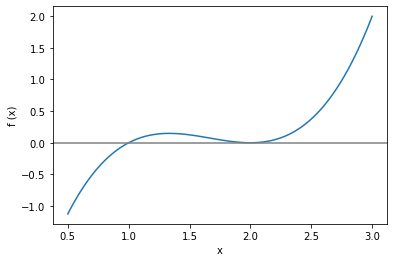

In [8]:
x = np.linspace(1/2,3,100)
y = (-4+8*x-5*x**2+x**3)

plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.axhline(0, color='gray')

plt.show()

<hr><b>3.2.4.</b> <br>
O polinômio $f(x) = x^4 − 4x^2 + 4$ possui raízes duplas em $\sqrt2$ e $−
\sqrt2$.
O método da bisseção pode ser aplicado a $f$? Explique

Não é possível, aconteceria que $f(x_k)$ >= 0, nunca trocaria de sinal, o que implicaria em aproximar o valor de $x_k$ para $b$, conforme  é visto abaixo:

In [9]:
def c(x):
    return (x**4-4*x**2+4)

print(biss(c, -1.5, -1, 1e-4, 30))

print(biss(c, 1, 1.5, 1e-4, 30))

-1.00006103515625
1.49993896484375


<hr><b>Seção 3.3
<br>3.3.1</b>
Resolver a equação $e^x = x + 2$ é equivalente a calcular os pontos
fixos da função $g(x) = e^x − 2$ (veja o Exemplo 3.3.1). Use a iteração do ponto fixo $x^{n+1} = g(x^n)$ com $x^{(1)} = −1,8$ para obter uma aproximação de uma das soluções da equação dada com 8 dígitos significativos.

In [10]:
def f(x):
    return np.exp(x)-2

In [11]:
n = 20

erro = []

x = np.zeros(n)

x[0] = -1.8  # valor inicial de x

for i in range(1, n):
    x[i] = f(x[i-1])
    erro.append(abs(x[i]-x[i-1]))
    
round(x[n-1],7)

-1.8414057

<hr><b>3.3.2.</b> <br>
Mostre que a equação:
$$cos(x) = x $$
possui uma única solução no intervalo [0, 1]. Use a iteração do ponto fixo e encontre uma aproximação para esta solução com 4 dígitos significativos.

In [12]:
def f(x):
    return x-np.cos(x)

def f1(x):
    return np.sin(x)+1

In [13]:
x = np.zeros(n)

x[0] = 0 

for i in range(1, n):
    x[i] = x[i-1]-f(x[i-1])/f1(x[i-1])
    
round(x[n-1],4)

0.7391

<hr><b>3.3.3.</b> <br>
Mostre que a equação $xe^x = 10$ é equivalente às seguintes equações:
$$x = ln \left (
\frac{10}{x}\right ) e \space x = 10e^{-x}.$$
Destas, considere as seguintes iterações de ponto fixo:

a) $x^{n+1} = ln \left ( 10 \over {x^{(n)}} \right )$

b) $x^{n+1} = 10e^{−x^{(n)}}$

Tomando $x^{(1)} = 1$, verifique se estas sequências são convergentes.

In [14]:
def f(x):
    return np.log(10/x)

In [15]:
n = 40
x = np.zeros(n)

x[0] = 1 

for i in range(1, n):
    x[i] = np.log(10/f(x[i-1]))
    if i <= 15:
        print('x^({:.0f}) \t = {:}'.format(i, x[i]))
    
round(x[n-1], 6)

x^(1) 	 = 1.4685526477460897
x^(2) 	 = 1.651141665065961
x^(3) 	 = 1.714177439764644
x^(4) 	 = 1.735198573043341
x^(5) 	 = 1.7421335202398134
x^(6) 	 = 1.744413450287821
x^(7) 	 = 1.7451621501671417
x^(8) 	 = 1.7454079223990204
x^(9) 	 = 1.7454885910873088
x^(10) 	 = 1.7455150675418922
x^(11) 	 = 1.7455237573256561
x^(12) 	 = 1.7455266093697899
x^(13) 	 = 1.745527545428094
x^(14) 	 = 1.7455278526480043
x^(15) 	 = 1.7455279534793933


1.745528

Portanto, esta é convergente.

In [16]:
def f(x):
    return 10*np.exp(-x)

In [17]:
x = np.zeros(n)
x[0] = 1

for i in range(1, n):
    x[i] = f(x[i-1])
    if i <= 15:
        print('x^({:.0f}) \t= 10e^{:.7f}\t = {:}'.format(i, x[i-1], x[i]))

x^(1) 	= 10e^1.0000000	 = 3.6787944117144233
x^(2) 	= 10e^3.6787944	 = 0.2525340169566391
x^(3) 	= 10e^0.2525340	 = 7.768297870046722
x^(4) 	= 10e^7.7682979	 = 0.004229325406322772
x^(5) 	= 10e^0.0042293	 = 9.957796055952333
x^(6) 	= 10e^9.9577961	 = 0.00047356993277065284
x^(7) 	= 10e^0.0004736	 = 9.99526542183771
x^(8) 	= 10e^9.9952654	 = 0.000456153889301612
x^(9) 	= 10e^0.0004562	 = 9.995439501330663
x^(10) 	= 10e^9.9954395	 = 0.0004560744891750208
x^(11) 	= 10e^0.0004561	 = 9.995440294969857
x^(12) 	= 10e^9.9954403	 = 0.0004560741272165747
x^(13) 	= 10e^0.0004561	 = 9.995440298587791
x^(14) 	= 10e^9.9954403	 = 0.0004560741255665284
x^(15) 	= 10e^0.0004561	 = 9.995440298604285


Portanto, esta não é convergente.

<hr><b>3.3.4.</b> <br>
Verifique (analiticamente) que a única solução real da equação:
$$xe^x = 10$$
é ponto fixo das seguintes funções:

a) $g(x) = ln \left (10 \over x \right)$

b) $g(x) = x − \frac {xe^x−10}{15}$

c) $g(x) = x − \frac {xe^x−10}{10+e^x}$

Implemente o processo iterativo $x^{(n+1)} = g(x^n))$ para $n \gt 0$ e compare o comportamento. Discuta os resultados com base na teoria estudada.

In [18]:
def f(x):
    return 10-(x*np.exp(x))

In [19]:
def g(x):
    return np.log(10/x)
x = np.zeros(n)
x[0] = 1

for i in range(1, n):
    x[i] = g(x[i-1])
    if i <= 15:
        print('x^({:.0f}) \t= {:}'.format(i, x[i-1], x[i]))
    
round(x[n-1],16)

x^(1) 	= 1.0
x^(2) 	= 2.302585092994046
x^(3) 	= 1.4685526477460897
x^(4) 	= 1.9183077706038578
x^(5) 	= 1.651141665065961
x^(6) 	= 1.8011181261248133
x^(7) 	= 1.714177439764644
x^(8) 	= 1.763651754393335
x^(9) 	= 1.735198573043341
x^(10) 	= 1.7514632348224655
x^(11) 	= 1.7421335202398134
x^(12) 	= 1.7474745698317786
x^(13) 	= 1.744413450287821
x^(14) 	= 1.7461667254847746
x^(15) 	= 1.7451621501671417


1.7455280030681641

In [20]:
def g(x):
    return x-(x*np.exp(x)-10)/15
x = np.zeros(n)
x[0] = 1

for i in range(1, n):
    x[i] = g(x[i-1])
    if i <= 15:
        print('x^({:.0f}) \t= {:}'.format(i, x[i-1], x[i]))
        
round(x[n-1],16)

x^(1) 	= 1.0
x^(2) 	= 1.4854478781027303
x^(3) 	= 1.7147052823160156
x^(4) 	= 1.7463550703899742
x^(5) 	= 1.74548732191791
x^(6) 	= 1.745529978443129
x^(7) 	= 1.7455279067285734
x^(8) 	= 1.7455280074064057
x^(9) 	= 1.7455280025139692
x^(10) 	= 1.7455280027517175
x^(11) 	= 1.7455280027401638
x^(12) 	= 1.7455280027407254
x^(13) 	= 1.745528002740698
x^(14) 	= 1.7455280027406994
x^(15) 	= 1.7455280027406992


1.7455280027406994

In [21]:
def h(x):
    return x-(x*np.exp(x)-10)/(10+np.exp(x))

x = np.zeros(n)
x[0] = 1

for i in range(1, n):
    x[i] = g(x[i-1])
    if i <= 15:
        print('x^({:.0f}) \t= {:}'.format(i, x[i-1], x[i]))
        
round(x[n-1], 16)

x^(1) 	= 1.0
x^(2) 	= 1.4854478781027303
x^(3) 	= 1.7147052823160156
x^(4) 	= 1.7463550703899742
x^(5) 	= 1.74548732191791
x^(6) 	= 1.745529978443129
x^(7) 	= 1.7455279067285734
x^(8) 	= 1.7455280074064057
x^(9) 	= 1.7455280025139692
x^(10) 	= 1.7455280027517175
x^(11) 	= 1.7455280027401638
x^(12) 	= 1.7455280027407254
x^(13) 	= 1.745528002740698
x^(14) 	= 1.7455280027406994
x^(15) 	= 1.7455280027406992


1.7455280027406994

Os valores mais precisos são o da segunda e terceira função pois se mantêm bem semelhantes entre si, além disso, ao se substituir os valorese obtidos em $f(x)$ podemos concluir que de fato estes são os mais próximos de 0 e mais adequados para se usar como raiz de $f$.

<hr><b>3.3.6.</b> </br>
Encontre a solução de cada equação com erro absoluto inferior a $10^{−6}$.

a) $e^x = x + 2$ no intervalo (−2,0).

b) $x^3 + 5x^2 − 12 = 0$ no intervalo (1,2).

c) $\sqrt x = cos(x)$ no intervalo (0,1).

In [22]:
#a) Idêntico à 3.3.1
def f(x):
    return np.exp(x)-2

x = np.zeros(n)
x[0] = -2
for i in range(1, n):
    x[i] = f(x[i-1])
    erro = (abs(x[i]-x[i-1]))
    if (erro < 1e-6):
        print("Encontrado:",x[i])
        break

Encontrado: -1.8414057183297619


In [23]:
def f(x):
    return (x**3)+(5*x**2)-12
def f1(x):
    return 3*x**2+10*x

f(0)

-12

In [24]:
n = 40
x = np.zeros(n)
x[0] = 1.5

for i in range(1, n):
    x[i] = x[i-1]-f(x[i-1])/f1(x[i-1])
    erro = abs(x[i]-x[i-1])
    if (erro < 1e-6):
        print("Encontrado:",x[i])
        break
        
f(x[n-1])

Encontrado: 1.3722813232690143


-12.0

$f(0) = f(1.3722813232690143) \approx -12$.

In [25]:
def f(x):
    return x-np.cos(x)

def f1(x):
    return np.sin(x)+1
x = np.zeros(n)

x[0] = 0

for i in range(1, n):
    x[i] = x[i-1]-f(x[i-1])/f1(x[i-1])
    erro = abs(x[i]-x[i-1])
    if (erro < 1e-6):
        print(round(x[i],7))
        break

0.7390851
